In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [2]:
# Load the data
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


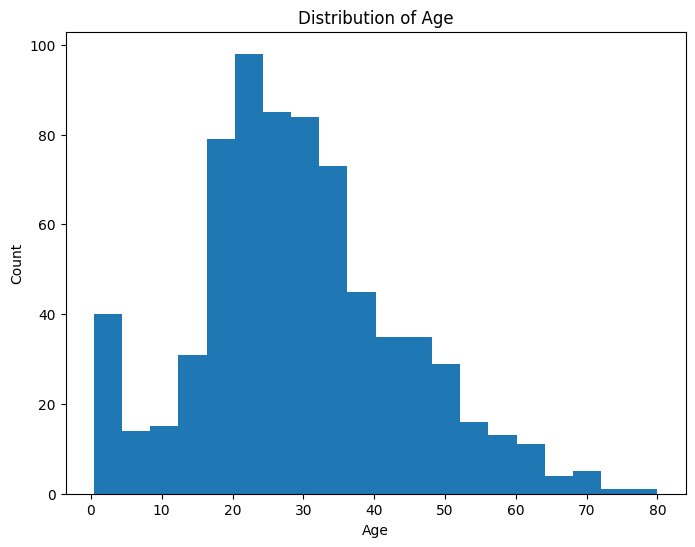

In [5]:
# Univariate Analysis
# Example: Plotting a histogram of the 'Age' feature
plt.figure(figsize=(8, 6))
plt.hist(data['Age'].dropna(), bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

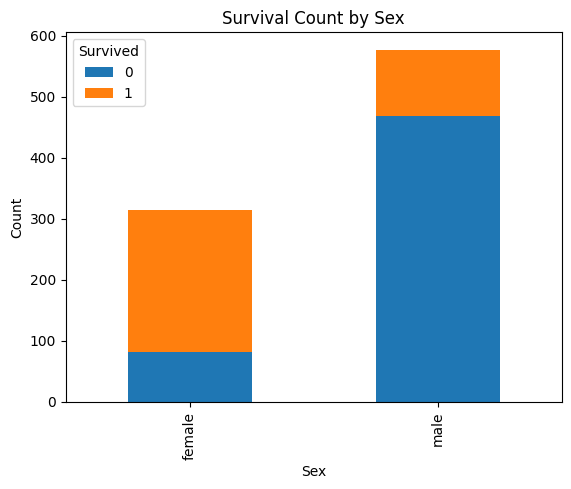

In [6]:
# Multivariate Analysis
# Example: Creating a stacked bar plot of 'Survived' by 'Sex'
survived_by_sex = data.groupby(['Sex', 'Survived']).size().unstack()
survived_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<ipython-input-7-e5a08da9a25c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 0]['Fare'], label='Not Survived', shade=True)
<ipython-input-7-e5a08da9a25c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 1]['Fare'], label='Survived', shade=True)


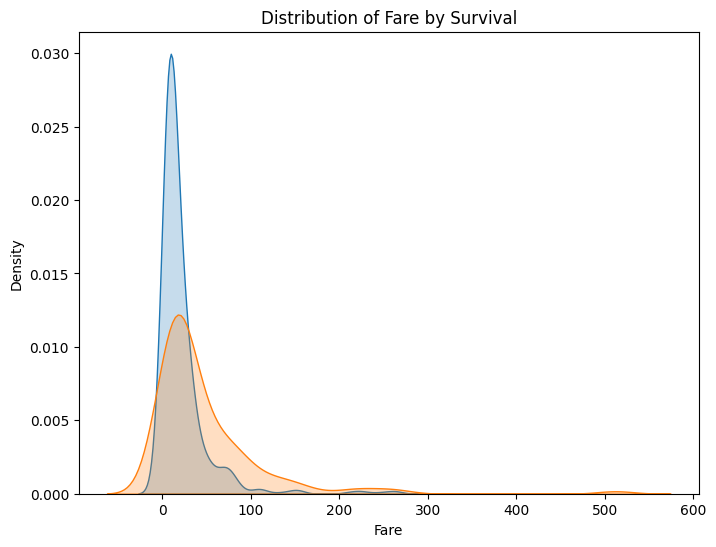

In [7]:
# KDE Plots
# Example: KDE plot of 'Fare' by 'Survived'
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['Survived'] == 0]['Fare'], label='Not Survived', shade=True)
sns.kdeplot(data[data['Survived'] == 1]['Fare'], label='Survived', shade=True)
plt.title('Distribution of Fare by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

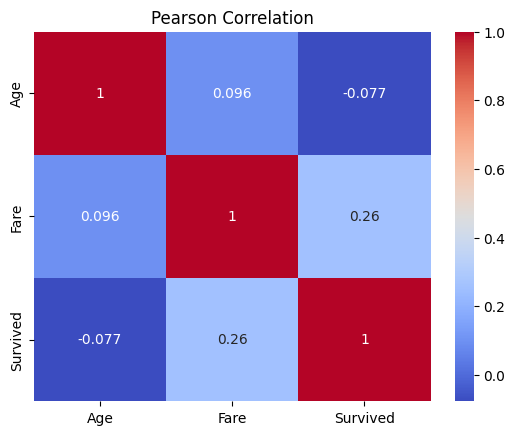

In [8]:
# Pearson Correlation
# Example: Computing Pearson correlation coefficient
correlation = data[['Age', 'Fare', 'Survived']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation')
plt.show()


In [9]:
# Step 3: Data Preprocessing
# Imputation
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

In [10]:
# Feature Engineering
# Example: Creating a new feature 'FamilySize'
data['FamilySize'] = data['Sib
Sp'] + data['Parch'] + 1

In [15]:
# Preprocess categorical variable 'Sex' using one-hot encoding
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

In [16]:
# Step 4: Cross-Validation
# Splitting the data into training and validation sets
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Training the classification model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [18]:
# Evaluating the model
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-Validation Scores:', scores)
print('Mean CV Score:', np.mean(scores))


Cross-Validation Scores: [0.83216783 0.79020979 0.78169014 0.79577465 0.81690141]
Mean CV Score: 0.8033487639121443


In [20]:
# Step 5: Model Evaluation Metrics
# ROC Curve
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

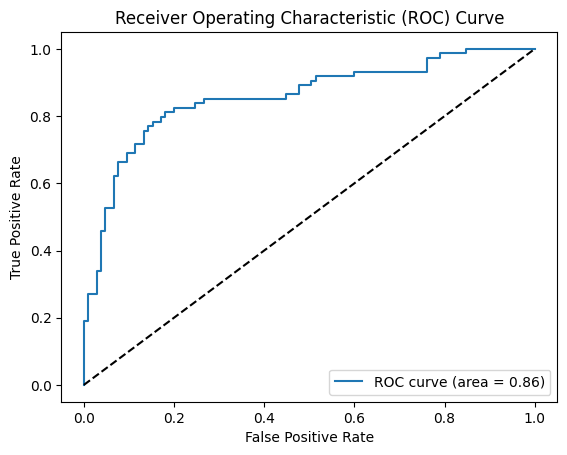

In [21]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

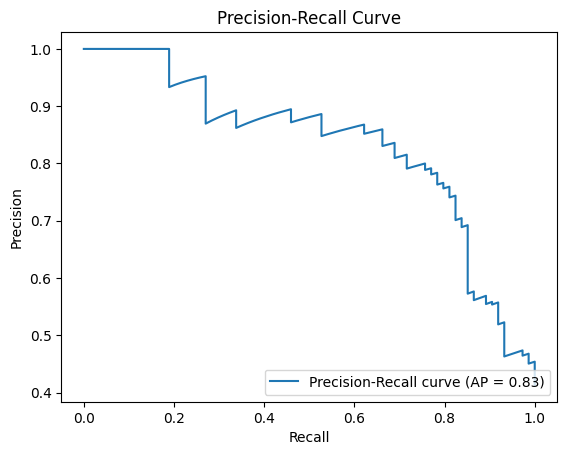

In [22]:
# Precision/Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_prob)
avg_precision = average_precision_score(y_val, y_prob)

plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Step 6: Inference Pipeline
# Assuming you have a separate test dataset named 'test.csv'
test_data = pd.read_csv('test.csv')

In [25]:
# Preprocess the test data using the same steps as above (imputation, feature engineering, one-hot encoding)

# Predict on the test data using the trained model
test_data['Age'] = imputer.transform(test_data[['Age']])
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data = pd.get_dummies(test_data, columns=['Sex'], drop_first=True)

In [26]:
X_test = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y_pred = model.predict(X_test)

In [27]:
# Step 7: Inference Pipeline
# Create a submission file
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

In [29]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')